1. 문제 정의하기<br>
<br>
다층 퍼셉트론 신경망 모델은 가장 기본적인 모델이라 대부분의 문제에 적용할 수 있다.<br>
데이터셋을 준비하기에 앞서, 매번 실행 시마다 결과가 달라지도록 않도록 랜덤 시드를 명시적으로 지정한다.<br>
이것을 하지 않으면 매번 실행 시마다 동일 모델임에도 불구하고 다른 결과가 나오기 때문에 연구 개발 단계에서 파라미터 조정이나 데이터셋에 따른 결과 차이를 보려면 랜덤시드를 지정해주는 것이 좋다.

In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


2. 데이터 준비하기<br>
<br>
오픈 데이터셋은 데이터에 관한 설명이 포함되어있다.<br>
주요 항목 : 인스턴스 수, 속성 수, 클래스 수<br>
실제 데이터 파일은 엑셀이나 메모장으로 확인할 수 있다. CSV 형태로 되어있다.<br>
numpy 패키지에서 제공하는 loadtxt() 함수를 통해 데이터를 불러온다

>dataset = np.loadtext("./path/data.data",delimiter='')

캐글에서는 받아온 데이터는 아래 코드로 사용한다. 아래는 참고사이트다<br> 
https://disq.us/url?url=https%3A%2F%2Fwww.kaggle.com%2Fuciml%2Fpima-indians-diabetes-database%3APyV1D3bLOFa7GgXV58oNGZytVbw&cuid=4784105<br>

>import pandas as pd <br>
>dataset = pd.read_csv("./path/data.csv", delimiter=",") <br>
>dataset = dataset.values <br>

In [2]:
import pandas as pd
dataset = pd.read_csv("./data/diabetes.csv", delimiter=",")
dataset = dataset.values

3. 데이터셋 생성하기<br>
<br>
데이터셋에는 속성값과 판정결과가 모두 포함되어 있기 때문에 입력(속성값 : 8개)과 출력(판정결과 : 1개) 변수로 분리한다.

>x_train = dataset[:700,0:8] <br>
>y_train = dataset[:700,8] <br>
>x_test = dataset[700:,0:8] <br>
>y_test = dataset[700:,0:8] 

In [3]:
x_train = dataset[:700,0:8]
x_test = dataset[700:,0:8]

y_train = dataset[:700,8] 
y_test = dataset[700:,8]

4. 모델 구성하기<br>
<br>
Dense 레이어만을 사용하여 다층 퍼셉트론 신경망 모델을 구성할 수 있다.<br>
속성이 8개이기 때문에 입력 뉴런이 8개이고 이진 분류이기 때문에 0~1 사이의 값을 나타내는 출력 뉴런이 1개이다.

>첫 번째 Dense 레이어는 은닉층(hidden layer)으로 8개 뉴런을 입력받아 12개 뉴런을 출력한다.<br>
>두 번째 Dense 레이어는 은닉층으로 12개 입력받아 8개 뉴런을 출력한다.<br>
>마지막 Dense 레이어는 출력 레이어로 8개 뉴런을 입력받아 1개 뉴런을 출력한다.

In [4]:
model = Sequential()
model.add(Dense(12, input_dim = 8, activation = 'relu'))
model.add(Dense(8, input_dim = 12, activation = 'relu'))
model.add(Dense(1, input_dim = 8, activation = 'sigmoid'))

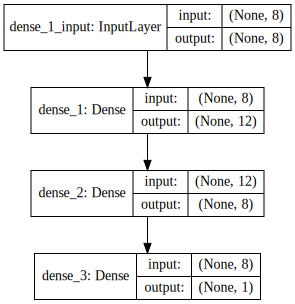

In [5]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

5. 모델 학습과정 설정하기<br>
<br>
모델을 정의하였다면 모델을 손실함수롸 최적화 알고리즘으로 엮어본다.<br>

>loss : 현재 가중치 세트를 평가하는데 사용한 손실함수. 이진 클래스이므로 'binary_crossentropy'으로 지정<br>
>optimizer :  최적의 가중치를 검색하는데 사용하는 최적화 알고리즘으로 효율적인 경사 하강법 알고리즘 중 하나인 'adam'을 사용<br>
>metrics : 평가 척도를 나타내며 분류 문제에서는 일반적으로 'accuracy'으로 지정

In [6]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

6. 모델 학습시키기<br>
<br>
모델을 학습시키기 위해서는 fit() 함수를 사용한다.<br>

>첫 번째 인자 : 입력 변수이다. 8개의 속성을 담고 있는 X를 입력한다.<br>
>두 번째 인자 : 출력 변수 즉 라벨값이다. 결과값을 담고 있는 Y를 입력한다.<br>
>nb_epoch : 전체 훈련 데이터셋에 대해 학습 반복 횟수를 지정한다. 1500이라 칭하면 1500번 반복 학습한다.<br>
>batch_size : 가중치를 업데이트할 배치 크기를 의미한다.

In [7]:
model.fit(x_train,y_train, nb_epoch=1500, batch_size=64)

/home/duckbe/virtual/ai/lib/python2.7/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/1500
700/700 [==============================] - 0s 177us/step - loss: 5.5446 - acc: 0.4714
Epoch 2/1500
700/700 [==============================] - 0s 21us/step - loss: 4.6378 - acc: 0.5043
Epoch 3/1500
700/700 [==============================] - 0s 32us/step - loss: 3.0097 - acc: 0.5443
Epoch 4/1500
700/700 [==============================] - 0s 40us/step - loss: 2.3728 - acc: 0.6143
Epoch 5/1500
700/700 [==============================] - 0s 26us/step - loss: 2.1696 - acc: 0.5914
Epoch 6/1500
700/700 [==============================] - 0s 32us/step - loss: 2.0996 - acc: 0.5957
Epoch 7/1500
700/700 [==============================] - 0s 23us/step - loss: 1.9833 - acc: 0.6057
Epoch 8/1500
700/700 [==============================] - 0s 20us/step - loss: 1.9126 - acc: 0.5857
Epoch 9/1500
700/700 [==============================] - 0s 33us/step - loss: 1.8115 - acc: 0.5957
Epoch 10/1500
700/700 [==============================] - 0s 41us/step - loss: 1.7201 - acc: 0.5971
Epoch 11/1500
700/

700/700 [==============================] - 0s 21us/step - loss: 0.5321 - acc: 0.7314
Epoch 84/1500
700/700 [==============================] - 0s 25us/step - loss: 0.5311 - acc: 0.7229
Epoch 85/1500
700/700 [==============================] - 0s 31us/step - loss: 0.5302 - acc: 0.7329
Epoch 86/1500
700/700 [==============================] - 0s 28us/step - loss: 0.5320 - acc: 0.7214
Epoch 87/1500
700/700 [==============================] - 0s 21us/step - loss: 0.5316 - acc: 0.7257
Epoch 88/1500
700/700 [==============================] - 0s 28us/step - loss: 0.5373 - acc: 0.7386
Epoch 89/1500
700/700 [==============================] - 0s 24us/step - loss: 0.5348 - acc: 0.7414
Epoch 90/1500
700/700 [==============================] - ETA: 0s - loss: 0.4491 - acc: 0.796 - 0s 19us/step - loss: 0.5336 - acc: 0.7243
Epoch 91/1500
700/700 [==============================] - 0s 32us/step - loss: 0.5284 - acc: 0.7300
Epoch 92/1500
700/700 [==============================] - 0s 26us/step - loss: 0.5255 

700/700 [==============================] - 0s 40us/step - loss: 0.5082 - acc: 0.7443
Epoch 165/1500
700/700 [==============================] - 0s 21us/step - loss: 0.5122 - acc: 0.7571
Epoch 166/1500
700/700 [==============================] - 0s 23us/step - loss: 0.5103 - acc: 0.7557
Epoch 167/1500
700/700 [==============================] - 0s 35us/step - loss: 0.5113 - acc: 0.7586
Epoch 168/1500
700/700 [==============================] - 0s 20us/step - loss: 0.5038 - acc: 0.7586
Epoch 169/1500
700/700 [==============================] - 0s 26us/step - loss: 0.5055 - acc: 0.7543
Epoch 170/1500
700/700 [==============================] - 0s 21us/step - loss: 0.5077 - acc: 0.7657
Epoch 171/1500
700/700 [==============================] - 0s 30us/step - loss: 0.5086 - acc: 0.7543
Epoch 172/1500
700/700 [==============================] - 0s 20us/step - loss: 0.5183 - acc: 0.7471
Epoch 173/1500
700/700 [==============================] - 0s 22us/step - loss: 0.5113 - acc: 0.7571
Epoch 174/1500


700/700 [==============================] - 0s 23us/step - loss: 0.5023 - acc: 0.7700
Epoch 246/1500
700/700 [==============================] - 0s 41us/step - loss: 0.4954 - acc: 0.7614
Epoch 247/1500
700/700 [==============================] - 0s 17us/step - loss: 0.4907 - acc: 0.7700
Epoch 248/1500
700/700 [==============================] - 0s 17us/step - loss: 0.5039 - acc: 0.7500
Epoch 249/1500
700/700 [==============================] - 0s 27us/step - loss: 0.5069 - acc: 0.7600
Epoch 250/1500
700/700 [==============================] - 0s 21us/step - loss: 0.4994 - acc: 0.7600
Epoch 251/1500
700/700 [==============================] - 0s 18us/step - loss: 0.4944 - acc: 0.7614
Epoch 252/1500
700/700 [==============================] - 0s 24us/step - loss: 0.4892 - acc: 0.7729
Epoch 253/1500
700/700 [==============================] - 0s 23us/step - loss: 0.4878 - acc: 0.7729
Epoch 254/1500
700/700 [==============================] - 0s 31us/step - loss: 0.5004 - acc: 0.7600
Epoch 255/1500


700/700 [==============================] - 0s 25us/step - loss: 0.4829 - acc: 0.7771
Epoch 328/1500
700/700 [==============================] - 0s 19us/step - loss: 0.4773 - acc: 0.7743
Epoch 329/1500
700/700 [==============================] - 0s 17us/step - loss: 0.4788 - acc: 0.7729
Epoch 330/1500
700/700 [==============================] - 0s 29us/step - loss: 0.4753 - acc: 0.7800
Epoch 331/1500
700/700 [==============================] - 0s 21us/step - loss: 0.4774 - acc: 0.7714
Epoch 332/1500
700/700 [==============================] - 0s 15us/step - loss: 0.4813 - acc: 0.7771
Epoch 333/1500
700/700 [==============================] - 0s 23us/step - loss: 0.4763 - acc: 0.7743
Epoch 334/1500
700/700 [==============================] - 0s 22us/step - loss: 0.4755 - acc: 0.7771
Epoch 335/1500
700/700 [==============================] - 0s 28us/step - loss: 0.4806 - acc: 0.7771
Epoch 336/1500
700/700 [==============================] - 0s 17us/step - loss: 0.4835 - acc: 0.7629
Epoch 337/1500


700/700 [==============================] - 0s 21us/step - loss: 0.4655 - acc: 0.7886
Epoch 410/1500
700/700 [==============================] - 0s 20us/step - loss: 0.4660 - acc: 0.7786
Epoch 411/1500
700/700 [==============================] - 0s 23us/step - loss: 0.4639 - acc: 0.7829
Epoch 412/1500
700/700 [==============================] - 0s 20us/step - loss: 0.4744 - acc: 0.7786
Epoch 413/1500
700/700 [==============================] - 0s 16us/step - loss: 0.4719 - acc: 0.7771
Epoch 414/1500
700/700 [==============================] - 0s 22us/step - loss: 0.4772 - acc: 0.7857
Epoch 415/1500
700/700 [==============================] - 0s 27us/step - loss: 0.4664 - acc: 0.7914
Epoch 416/1500
700/700 [==============================] - 0s 30us/step - loss: 0.4718 - acc: 0.7671
Epoch 417/1500
700/700 [==============================] - 0s 16us/step - loss: 0.4634 - acc: 0.7843
Epoch 418/1500
700/700 [==============================] - 0s 17us/step - loss: 0.4812 - acc: 0.7643
Epoch 419/1500


700/700 [==============================] - 0s 37us/step - loss: 0.4562 - acc: 0.7914
Epoch 492/1500
700/700 [==============================] - 0s 18us/step - loss: 0.4581 - acc: 0.7886
Epoch 493/1500
700/700 [==============================] - 0s 27us/step - loss: 0.4703 - acc: 0.7786
Epoch 494/1500
700/700 [==============================] - 0s 16us/step - loss: 0.4694 - acc: 0.7686
Epoch 495/1500
700/700 [==============================] - 0s 21us/step - loss: 0.4612 - acc: 0.7986
Epoch 496/1500
700/700 [==============================] - 0s 26us/step - loss: 0.4562 - acc: 0.7914
Epoch 497/1500
700/700 [==============================] - 0s 29us/step - loss: 0.4602 - acc: 0.7929
Epoch 498/1500
700/700 [==============================] - 0s 17us/step - loss: 0.4639 - acc: 0.7771
Epoch 499/1500
700/700 [==============================] - 0s 16us/step - loss: 0.4643 - acc: 0.7871
Epoch 500/1500
700/700 [==============================] - 0s 24us/step - loss: 0.4582 - acc: 0.7900
Epoch 501/1500


700/700 [==============================] - 0s 26us/step - loss: 0.4566 - acc: 0.7857
Epoch 573/1500
700/700 [==============================] - 0s 21us/step - loss: 0.4572 - acc: 0.7814
Epoch 574/1500
700/700 [==============================] - 0s 15us/step - loss: 0.4495 - acc: 0.7957
Epoch 575/1500
700/700 [==============================] - 0s 15us/step - loss: 0.4485 - acc: 0.8029
Epoch 576/1500
700/700 [==============================] - 0s 23us/step - loss: 0.4484 - acc: 0.7929
Epoch 577/1500
700/700 [==============================] - 0s 19us/step - loss: 0.4494 - acc: 0.8000
Epoch 578/1500
700/700 [==============================] - 0s 16us/step - loss: 0.4506 - acc: 0.7929
Epoch 579/1500
700/700 [==============================] - 0s 20us/step - loss: 0.4552 - acc: 0.7900
Epoch 580/1500
700/700 [==============================] - 0s 26us/step - loss: 0.4511 - acc: 0.7857
Epoch 581/1500
700/700 [==============================] - 0s 36us/step - loss: 0.4560 - acc: 0.7786
Epoch 582/1500


700/700 [==============================] - 0s 21us/step - loss: 0.4468 - acc: 0.7943
Epoch 655/1500
700/700 [==============================] - 0s 26us/step - loss: 0.4540 - acc: 0.7829
Epoch 656/1500
700/700 [==============================] - 0s 38us/step - loss: 0.4513 - acc: 0.7943
Epoch 657/1500
700/700 [==============================] - 0s 16us/step - loss: 0.4476 - acc: 0.7929
Epoch 658/1500
700/700 [==============================] - 0s 31us/step - loss: 0.4526 - acc: 0.7829
Epoch 659/1500
700/700 [==============================] - 0s 20us/step - loss: 0.4543 - acc: 0.7943
Epoch 660/1500
700/700 [==============================] - 0s 16us/step - loss: 0.4467 - acc: 0.7929
Epoch 661/1500
700/700 [==============================] - 0s 22us/step - loss: 0.4433 - acc: 0.7914
Epoch 662/1500
700/700 [==============================] - 0s 22us/step - loss: 0.4443 - acc: 0.8000
Epoch 663/1500
700/700 [==============================] - 0s 27us/step - loss: 0.4412 - acc: 0.8043
Epoch 664/1500


700/700 [==============================] - 0s 26us/step - loss: 0.4408 - acc: 0.8043
Epoch 736/1500
700/700 [==============================] - 0s 42us/step - loss: 0.4416 - acc: 0.8086
Epoch 737/1500
700/700 [==============================] - 0s 30us/step - loss: 0.4450 - acc: 0.7886
Epoch 738/1500
700/700 [==============================] - 0s 31us/step - loss: 0.4413 - acc: 0.7871
Epoch 739/1500
700/700 [==============================] - 0s 22us/step - loss: 0.4494 - acc: 0.7929
Epoch 740/1500
700/700 [==============================] - 0s 20us/step - loss: 0.4459 - acc: 0.7886
Epoch 741/1500
700/700 [==============================] - 0s 32us/step - loss: 0.4397 - acc: 0.7957
Epoch 742/1500
700/700 [==============================] - 0s 30us/step - loss: 0.4451 - acc: 0.7900
Epoch 743/1500
700/700 [==============================] - 0s 24us/step - loss: 0.4441 - acc: 0.7829
Epoch 744/1500
700/700 [==============================] - 0s 23us/step - loss: 0.4449 - acc: 0.8000
Epoch 745/1500


700/700 [==============================] - 0s 15us/step - loss: 0.4486 - acc: 0.7914
Epoch 818/1500
700/700 [==============================] - 0s 15us/step - loss: 0.4414 - acc: 0.8000
Epoch 819/1500
700/700 [==============================] - 0s 17us/step - loss: 0.4428 - acc: 0.7857
Epoch 820/1500
700/700 [==============================] - 0s 18us/step - loss: 0.4424 - acc: 0.7943
Epoch 821/1500
700/700 [==============================] - 0s 15us/step - loss: 0.4367 - acc: 0.8029
Epoch 822/1500
700/700 [==============================] - 0s 16us/step - loss: 0.4443 - acc: 0.7971
Epoch 823/1500
700/700 [==============================] - 0s 18us/step - loss: 0.4370 - acc: 0.8014
Epoch 824/1500
700/700 [==============================] - 0s 38us/step - loss: 0.4364 - acc: 0.7971
Epoch 825/1500
700/700 [==============================] - 0s 20us/step - loss: 0.4402 - acc: 0.7971
Epoch 826/1500
700/700 [==============================] - 0s 15us/step - loss: 0.4376 - acc: 0.8029
Epoch 827/1500


700/700 [==============================] - 0s 29us/step - loss: 0.4518 - acc: 0.7871
Epoch 900/1500
700/700 [==============================] - 0s 15us/step - loss: 0.4398 - acc: 0.7943
Epoch 901/1500
700/700 [==============================] - 0s 15us/step - loss: 0.4371 - acc: 0.7943
Epoch 902/1500
700/700 [==============================] - 0s 25us/step - loss: 0.4354 - acc: 0.7943
Epoch 903/1500
700/700 [==============================] - 0s 19us/step - loss: 0.4360 - acc: 0.7914
Epoch 904/1500
700/700 [==============================] - 0s 28us/step - loss: 0.4365 - acc: 0.7957
Epoch 905/1500
700/700 [==============================] - 0s 19us/step - loss: 0.4405 - acc: 0.7800
Epoch 906/1500
700/700 [==============================] - 0s 50us/step - loss: 0.4313 - acc: 0.7971
Epoch 907/1500
700/700 [==============================] - 0s 26us/step - loss: 0.4423 - acc: 0.7914
Epoch 908/1500
700/700 [==============================] - 0s 17us/step - loss: 0.4360 - acc: 0.7971
Epoch 909/1500


700/700 [==============================] - 0s 25us/step - loss: 0.4400 - acc: 0.8057
Epoch 982/1500
700/700 [==============================] - 0s 18us/step - loss: 0.4345 - acc: 0.7929
Epoch 983/1500
700/700 [==============================] - 0s 21us/step - loss: 0.4383 - acc: 0.7929
Epoch 984/1500
700/700 [==============================] - 0s 21us/step - loss: 0.4364 - acc: 0.7986
Epoch 985/1500
700/700 [==============================] - 0s 23us/step - loss: 0.4372 - acc: 0.7943
Epoch 986/1500
700/700 [==============================] - 0s 22us/step - loss: 0.4441 - acc: 0.7886
Epoch 987/1500
700/700 [==============================] - 0s 18us/step - loss: 0.4363 - acc: 0.8043
Epoch 988/1500
700/700 [==============================] - 0s 14us/step - loss: 0.4363 - acc: 0.7971
Epoch 989/1500
700/700 [==============================] - 0s 18us/step - loss: 0.4349 - acc: 0.8057
Epoch 990/1500
700/700 [==============================] - 0s 24us/step - loss: 0.4357 - acc: 0.7943
Epoch 991/1500


700/700 [==============================] - 0s 20us/step - loss: 0.4354 - acc: 0.7929
Epoch 1063/1500
700/700 [==============================] - 0s 19us/step - loss: 0.4281 - acc: 0.8071
Epoch 1064/1500
700/700 [==============================] - 0s 22us/step - loss: 0.4354 - acc: 0.7871
Epoch 1065/1500
700/700 [==============================] - 0s 14us/step - loss: 0.4332 - acc: 0.7929
Epoch 1066/1500
700/700 [==============================] - 0s 15us/step - loss: 0.4330 - acc: 0.8029
Epoch 1067/1500
700/700 [==============================] - 0s 19us/step - loss: 0.4316 - acc: 0.8014
Epoch 1068/1500
700/700 [==============================] - 0s 20us/step - loss: 0.4308 - acc: 0.8029
Epoch 1069/1500
700/700 [==============================] - 0s 31us/step - loss: 0.4334 - acc: 0.7957
Epoch 1070/1500
700/700 [==============================] - 0s 17us/step - loss: 0.4323 - acc: 0.7957
Epoch 1071/1500
700/700 [==============================] - 0s 17us/step - loss: 0.4303 - acc: 0.7943
Epoch 

700/700 [==============================] - 0s 17us/step - loss: 0.4358 - acc: 0.8000
Epoch 1144/1500
700/700 [==============================] - 0s 16us/step - loss: 0.4289 - acc: 0.8000
Epoch 1145/1500
700/700 [==============================] - 0s 16us/step - loss: 0.4295 - acc: 0.8000
Epoch 1146/1500
700/700 [==============================] - 0s 17us/step - loss: 0.4313 - acc: 0.8071
Epoch 1147/1500
700/700 [==============================] - 0s 18us/step - loss: 0.4337 - acc: 0.7886
Epoch 1148/1500
700/700 [==============================] - 0s 17us/step - loss: 0.4356 - acc: 0.8000
Epoch 1149/1500
700/700 [==============================] - 0s 21us/step - loss: 0.4313 - acc: 0.7957
Epoch 1150/1500
700/700 [==============================] - 0s 24us/step - loss: 0.4394 - acc: 0.7943
Epoch 1151/1500
700/700 [==============================] - 0s 27us/step - loss: 0.4312 - acc: 0.8057
Epoch 1152/1500
700/700 [==============================] - 0s 16us/step - loss: 0.4324 - acc: 0.7943
Epoch 

700/700 [==============================] - 0s 15us/step - loss: 0.4295 - acc: 0.8000
Epoch 1225/1500
700/700 [==============================] - 0s 18us/step - loss: 0.4306 - acc: 0.7986
Epoch 1226/1500
700/700 [==============================] - 0s 23us/step - loss: 0.4281 - acc: 0.7986
Epoch 1227/1500
700/700 [==============================] - 0s 19us/step - loss: 0.4307 - acc: 0.7914
Epoch 1228/1500
700/700 [==============================] - 0s 17us/step - loss: 0.4314 - acc: 0.7971
Epoch 1229/1500
700/700 [==============================] - 0s 18us/step - loss: 0.4341 - acc: 0.7914
Epoch 1230/1500
700/700 [==============================] - 0s 26us/step - loss: 0.4295 - acc: 0.8043
Epoch 1231/1500
700/700 [==============================] - 0s 20us/step - loss: 0.4330 - acc: 0.8043
Epoch 1232/1500
700/700 [==============================] - 0s 16us/step - loss: 0.4403 - acc: 0.7943
Epoch 1233/1500
700/700 [==============================] - 0s 23us/step - loss: 0.4287 - acc: 0.8014
Epoch 

700/700 [==============================] - 0s 19us/step - loss: 0.4341 - acc: 0.8014
Epoch 1306/1500
700/700 [==============================] - 0s 15us/step - loss: 0.4261 - acc: 0.7986
Epoch 1307/1500
700/700 [==============================] - 0s 20us/step - loss: 0.4282 - acc: 0.8000
Epoch 1308/1500
700/700 [==============================] - 0s 36us/step - loss: 0.4254 - acc: 0.8000
Epoch 1309/1500
700/700 [==============================] - 0s 41us/step - loss: 0.4313 - acc: 0.8029
Epoch 1310/1500
700/700 [==============================] - 0s 32us/step - loss: 0.4322 - acc: 0.8043
Epoch 1311/1500
700/700 [==============================] - 0s 20us/step - loss: 0.4270 - acc: 0.7957
Epoch 1312/1500
700/700 [==============================] - 0s 15us/step - loss: 0.4307 - acc: 0.8114
Epoch 1313/1500
700/700 [==============================] - 0s 16us/step - loss: 0.4269 - acc: 0.8043
Epoch 1314/1500
700/700 [==============================] - 0s 21us/step - loss: 0.4303 - acc: 0.7943
Epoch 

700/700 [==============================] - 0s 26us/step - loss: 0.4266 - acc: 0.7929
Epoch 1387/1500
700/700 [==============================] - 0s 18us/step - loss: 0.4274 - acc: 0.8029
Epoch 1388/1500
700/700 [==============================] - 0s 16us/step - loss: 0.4288 - acc: 0.7986
Epoch 1389/1500
700/700 [==============================] - 0s 14us/step - loss: 0.4256 - acc: 0.8043
Epoch 1390/1500
700/700 [==============================] - 0s 33us/step - loss: 0.4272 - acc: 0.8014
Epoch 1391/1500
700/700 [==============================] - 0s 16us/step - loss: 0.4373 - acc: 0.7957
Epoch 1392/1500
700/700 [==============================] - 0s 23us/step - loss: 0.4346 - acc: 0.8000
Epoch 1393/1500
700/700 [==============================] - 0s 23us/step - loss: 0.4242 - acc: 0.7957
Epoch 1394/1500
700/700 [==============================] - 0s 27us/step - loss: 0.4262 - acc: 0.8043
Epoch 1395/1500
700/700 [==============================] - 0s 31us/step - loss: 0.4249 - acc: 0.7943
Epoch 

700/700 [==============================] - 0s 20us/step - loss: 0.4302 - acc: 0.7986
Epoch 1468/1500
700/700 [==============================] - 0s 24us/step - loss: 0.4243 - acc: 0.8000
Epoch 1469/1500
700/700 [==============================] - 0s 19us/step - loss: 0.4251 - acc: 0.8014
Epoch 1470/1500
700/700 [==============================] - 0s 21us/step - loss: 0.4238 - acc: 0.7943
Epoch 1471/1500
700/700 [==============================] - 0s 17us/step - loss: 0.4267 - acc: 0.8029
Epoch 1472/1500
700/700 [==============================] - 0s 21us/step - loss: 0.4291 - acc: 0.8014
Epoch 1473/1500
700/700 [==============================] - 0s 20us/step - loss: 0.4263 - acc: 0.7943
Epoch 1474/1500
700/700 [==============================] - 0s 14us/step - loss: 0.4248 - acc: 0.7957
Epoch 1475/1500
700/700 [==============================] - 0s 19us/step - loss: 0.4241 - acc: 0.7986
Epoch 1476/1500
700/700 [==============================] - 0s 29us/step - loss: 0.4284 - acc: 0.8000
Epoch 

7. 모델 평가하기<br>
<br>
시험셋으로 학습한 모델을 평가한다.

In [8]:
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=64)
print '%s : %0.2f%%'  %(model.metrics_names[1], loss_and_metrics[1]*100) 

68/68 [==============================] - 0s 339us/step
acc : 75.00%
